# DEMO Log In and Download Sentinel 3 Image

In [1]:
import openeo
from matplotlib import pyplot as plt
import rasterio.plot
import io
import tarfile
import numpy as np

%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 10]

In [2]:
connection = openeo.connect('https://openeo.digitalearth.se')
connection.authenticate_basic(username='ix101', password='secretpassword')


<Connection to 'https://openeo.digitalearth.se/' with BasicBearerAuth>

In [3]:
connection.list_collections()

[{'stac_version': '1.0.0',
  'type': 'Collection',
  'id': 'NMD_Produktivitet_v1_1',
  'title': 'NMD_Produktivitet_v1_1',
  'description': 'Tilläggsskikt produktivitet',
  'license': 'CC0-1.0',
  'extent': {'spatial': {'bbox': [[8.000013270356117,
      54.99999600913266,
      25.000000809024733,
      68.99999769658118]]},
   'temporal': {'interval': [['2023-04-27T06:26:59.086425Z',
      '2023-04-27T06:26:59.086425Z']]}},
  'links': [{'rel': 'root',
    'href': 'https://explorer.digitalearth.se/stac',
    'type': 'application/json',
    'title': 'Default ODC Explorer instance'},
   {'rel': 'self',
    'href': 'https://explorer.digitalearth.se/stac/collections/NMD_Produktivitet_v1_1'},
   {'rel': 'items',
    'href': 'https://explorer.digitalearth.se/stac/collections/NMD_Produktivitet_v1_1/items'},
   {'rel': 'http://www.opengis.net/def/rel/ogc/1.0/queryables',
    'href': 'https://explorer.digitalearth.se/stac/collections/NMD_Produktivitet_v1_1/queryables'},
   {'rel': 'child',
    'href': 'https://explorer.digitalearth.se/stac/catalogs/NMD_Produktivitet_v1_1/2023-4'}],
  'cube:dimensions': {'x': {'type': 'spatial',
    'axis': 'x',
    'extent': [8.000013270356117, 25.000000809024733],
    'reference_system': 4326},
   'y': {'type': 'spatial',
    'axis': 'y',
    'extent': [54.99999600913266, 68.99999769658118],
    'reference_system': 4326},
   't': {'type': 'temporal',
    'extent': ['2023-04-27T06:26:59.086425Z', '2023-04-27T06:26:59.086425Z'],
    'step': None},
   'bands': {'type': 'bands', 'values': ['produktivitet']}},
  'summaries': {}},
 {'stac_version': '1.0.0',
  'type': 'Collection',
  'id': 'nmd2018bas_ogeneraliserad_v1_1',
  'title': 'nmd2018bas_ogeneraliserad_v1_1',
  'description': 'Nationella marktäckedata (NMD)',
  'license': 'CC0-1.0',
  'extent': {'spatial': {'bbox': [[8.000013270356117,
      54.99999600913266,
      25.000000809024733,
      68.99999769658118]]},
   'temporal': {'interval': [['2023-04-25T14:23:34.643233Z',
      '2023-04-25T14:23:34.643233Z']]}},
  'links': [{'rel': 'root',
    'href': 'https://explorer.digitalearth.se/stac',
    'type': 'application/json',
    'title': 'Default ODC Explorer instance'},
   {'rel': 'self',
    'href': 'https://explorer.digitalearth.se/stac/collections/nmd2018bas_ogeneraliserad_v1_1'},
   {'rel': 'items',
    'href': 'https://explorer.digitalearth.se/stac/collections/nmd2018bas_ogeneraliserad_v1_1/items'},
   {'rel': 'http://www.opengis.net/def/rel/ogc/1.0/queryables',
    'href': 'https://explorer.digitalearth.se/stac/collections/nmd2018bas_ogeneraliserad_v1_1/queryables'},
   {'rel': 'child',
    'href': 'https://explorer.digitalearth.se/stac/catalogs/nmd2018bas_ogeneraliserad_v1_1/2023-4'}],
  'cube:dimensions': {'x': {'type': 'spatial',
    'axis': 'x',
    'extent': [8.000013270356117, 25.000000809024733],
    'reference_system': 4326},
   'y': {'type': 'spatial',
    'axis': 'y',
    'extent': [54.99999600913266, 68.99999769658118],
    'reference_system': 4326},
   't': {'type': 'temporal',
    'extent': ['2023-04-25T14:23:34.643233Z', '2023-04-25T14:23:34.643233Z'],
    'step': None},
   'bands': {'type': 'bands', 'values': ['basskikt']}},
  'summaries': {}},
 {'stac_version': '1.0.0',
  'type': 'Collection',
  'id': 's2_msi_l1c',
  'title': 's2_msi_l1c',
  'description': 'Sentinel-2 Level1C - Ortho Rectified Top of Atmosphere Reflectance',
  'license': 'CC-BY-4.0',
  'extent': {'spatial': {'bbox': [[8.999626281785673,
      54.9150072246983,
      26.330890180835535,
      69.4096405079696]]},
   'temporal': {'interval': [['2015-07-04T10:10:06.027000Z',
      '2023-11-06T10:51:39.024000Z']]}},
  'links': [{'rel': 'root',
    'href': 'https://explorer.digitalearth.se/stac',
    'type': 'application/json',
    'title': 'Default ODC Explorer instance'},
   {'rel': 'self',
    'href': 'https://explorer.digitalearth.se/stac/collections/s2_msi_l1c'},
   {'rel': 'items',
    'href': 'https://explorer.digitalearth.se/stac/collections/s2_msi_l1c/items'

# Sentinel 2 Images

In [4]:
"""
"west": 12.983871361908623,
"east": 13.027044903406129,
"south": 57.504782604320866,
"north": 57.52491163254996

temporal_extent=["2021-07-01T00:00:00Z", "2021-08-01T00:00:00Z"],
"""

"""
spatial_extent={
"west": 12.168931129792837,
"east": 12.315364805535772,
"south": 59.49620035538669,
"north": 59.558476344057084
    },
temporal_extent=["2018-06-01T00:00:00Z", "2018-07-01T00:00:00Z"],
"""

'\nspatial_extent={\n"west": 12.168931129792837,\n"east": 12.315364805535772,\n"south": 59.49620035538669,\n"north": 59.558476344057084\n    },\ntemporal_extent=["2018-06-01T00:00:00Z", "2018-07-01T00:00:00Z"],\n'

In [5]:
"""
Setup for "time_series_1"
spatial_extent={
"west": 12.983871361908623,
"east": 13.027044903406129,
"south": 57.504782604320866,
"north": 57.52491163254996
    },
temporal_extent=["2021-07-01T00:00:00Z", "2021-08-01T00:00:00Z"],
"""

'\nSetup for "time_series_1"\nspatial_extent={\n"west": 12.983871361908623,\n"east": 13.027044903406129,\n"south": 57.504782604320866,\n"north": 57.52491163254996\n    },\ntemporal_extent=["2021-07-01T00:00:00Z", "2021-08-01T00:00:00Z"],\n'

In [11]:
'''west=16.137817228228542
east= 16.147572860117677
south= 62.37501267731949
north= 62.379494281981096
'''
west= 12.66077565271702
east= 12.674484342481849
south= 59.01595426665847
north= 59.02335297395149


res=connection.load_collection(
                         "s2_msi_l1c",
                         spatial_extent={
                            "west": west,
                            "east": east,
                            "south": south,
                            "north": north
                             },
                         #temporal_extent=["2021-07-01T00:00:00Z", "2021-08-01T00:00:00Z"],
                         temporal_extent=["2020-05-15T00:00:00Z", "2020-06-01T00:00:00Z"],
                         bands=['b02','b03','b04','b05','b06','b07','b08','b8a','b09','b10','b11','b12']
                        )
res.flat_graph()
'''
west= 12.66077565271702
east= 12.674484342481849
south= 59.01595426665847
north= 59.02335297395149


res=connection.load_collection(
                         "s2_msi_l1c",
                         spatial_extent={
                            "west": west,
                            "east": east,
                            "south": south,
                            "north": north
                             },
                         temporal_extent=["2023-07-01T00:00:00Z","2023-07-31T00:00:00Z"],
                         bands=['b02','b03','b04','b05','b06','b07','b08','b8a','b09','b10','b11','b12']
                        )
res.flat_graph()'''

'\nwest= 12.66077565271702\neast= 12.674484342481849\nsouth= 59.01595426665847\nnorth= 59.02335297395149\n\n\nres=connection.load_collection(\n                         "s2_msi_l1c",\n                         spatial_extent={\n                            "west": west,\n                            "east": east,\n                            "south": south,\n                            "north": north\n                             },\n                         temporal_extent=["2023-07-01T00:00:00Z","2023-07-31T00:00:00Z"],\n                         bands=[\'b02\',\'b03\',\'b04\',\'b05\',\'b06\',\'b07\',\'b08\',\'b8a\',\'b09\',\'b10\',\'b11\',\'b12\']\n                        )\nres.flat_graph()'

In [12]:
res

In [13]:
import shutil
fname='/cloud/openeo/Anton/Amalforest'
res.download(outputfile=fname,format="netcdf")

In [14]:
import xarray as xr
loaded_data = xr.open_dataset(fname, engine='netcdf4', decode_times=True)
nodata = loaded_data.attrs.get("nodata", None)
loaded_data = loaded_data.where(loaded_data != nodata, np.nan)
loaded_data

<xarray.Dataset> Size: 8MB
Dimensions:      (t: 12, y: 86, x: 83)
Coordinates:
  * t            (t) datetime64[ns] 96B 2023-07-01T10:36:31.024000 ... 2023-0...
  * y            (y) float64 688B 6.545e+06 6.545e+06 ... 6.544e+06 6.544e+06
  * x            (x) float64 664B 3.657e+05 3.657e+05 ... 3.665e+05 3.665e+05
    spatial_ref  int32 4B 3006
Data variables:
    b02          (t, y, x) float64 685kB 1.755e+03 1.755e+03 ... 8.462e+03
    b03          (t, y, x) float64 685kB 8.453e+03 8.453e+03 ... 1.292e+03
    b04          (t, y, x) float64 685kB 1.352e+03 1.352e+03 ... 3.638e+03
    b05          (t, y, x) float64 685kB 3.733e+03 3.086e+03 ... 0.0 0.0
    b06          (t, y, x) float64 685kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    b07          (t, y, x) float64 685kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    b08          (t, y, x) float64 685kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    b8a          (t, y, x) float64 685kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    b09          (t, y, x) float64 685kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    b10          (t, y, x) float64 685kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    b11          (t, y, x) float64 685kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    b12          (t, y, x) float64 685kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
Attributes:
    crs:                EPSG:3006
    nodata:             -9999
    collection:         s2_msi_l1c
    datetime_from_dim:  2024-03-27T09:20:05.787300

In [15]:
import datetime
from pysolar.solar import *

times=loaded_data['t'].data
loaded_data=loaded_data.assign({"west":west,"east":east,"north":north,"south":south})

lat=(west+east)/2
long=(south+north)/2

sun_zenith_angles=[]
for time in times:
    tmp=time.astype('datetime64[us]')
    tmp=tmp.astype(datetime.datetime)
    dobj = datetime.datetime(tmp.year,tmp.month,tmp.day,tmp.hour,tmp.minute,tmp.second,tmp.microsecond,tzinfo=datetime.timezone.utc)
    sea = get_altitude(lat, long, dobj)
    sza = float(90)- sea
    sun_zenith_angles.append(sza)

loaded_data=loaded_data.assign({"sun_zenith":sun_zenith_angles})
loaded_data.to_netcdf(fname)

PermissionError: [Errno 13] Permission denied: '/cloud/openeo/Anton/Amalforest'

In [ ]:
loaded_data

<xarray.Dataset> Size: 3MB
Dimensions:      (t: 10, y: 52, x: 52, sun_zenith: 10)
Coordinates:
  * t            (t) datetime64[ns] 80B 2020-05-16T10:15:59.024000 ... 2020-0...
  * y            (y) float64 416B 6.917e+06 6.917e+06 ... 6.916e+06 6.916e+06
  * x            (x) float64 416B 5.589e+05 5.589e+05 ... 5.594e+05 5.594e+05
    spatial_ref  int32 4B 3006
  * sun_zenith   (sun_zenith) float64 80B 35.58 41.35 37.9 ... 41.11 37.68 36.36
Data variables: (12/16)
    b02          (t, y, x) float64 216kB 1.74e+03 1.699e+03 ... 772.0 776.0
    b03          (t, y, x) float64 216kB 1.367e+03 1.37e+03 ... 648.0 637.0
    b04          (t, y, x) float64 216kB 1.253e+03 1.25e+03 ... 387.0 389.0
    b05          (t, y, x) float64 216kB 1.475e+03 1.428e+03 ... 680.0 677.0
    b06          (t, y, x) float64 216kB 1.924e+03 1.866e+03 ... 1.339e+03
    b07          (t, y, x) float64 216kB 2.073e+03 2.065e+03 ... 1.567e+03
    ...           ...
    b11          (t, y, x) float64 216kB 1.291e+03 1.26e+03 ... 834.0 824.0
    b12          (t, y, x) float64 216kB 1.088e+03 1.122e+03 ... 397.0 398.0
    west         float64 8B 16.14
    east         float64 8B 16.15
    north        float64 8B 62.38
    south        float64 8B 62.38
Attributes:
    crs:                EPSG:3006
    nodata:             -9999
    collection:         s2_msi_l1c
    datetime_from_dim:  2024-03-26T12:47:07.333970

In [ ]:
loaded_data = xr.open_dataset(fname, engine='netcdf4', decode_times=True)
nodata = loaded_data.attrs.get("nodata", None)
loaded_data = loaded_data.where(loaded_data != nodata, np.nan)
loaded_data

<xarray.Dataset> Size: 3MB
Dimensions:      (t: 10, y: 52, x: 52, sun_zenith: 10)
Coordinates:
  * t            (t) datetime64[ns] 80B 2020-05-16T10:15:59.024000 ... 2020-0...
  * y            (y) float64 416B 6.917e+06 6.917e+06 ... 6.916e+06 6.916e+06
  * x            (x) float64 416B 5.589e+05 5.589e+05 ... 5.594e+05 5.594e+05
    spatial_ref  int32 4B 3006
  * sun_zenith   (sun_zenith) float64 80B 35.58 41.35 37.9 ... 41.11 37.68 36.36
Data variables: (12/16)
    b02          (t, y, x) float64 216kB 1.74e+03 1.699e+03 ... 772.0 776.0
    b03          (t, y, x) float64 216kB 1.367e+03 1.37e+03 ... 648.0 637.0
    b04          (t, y, x) float64 216kB 1.253e+03 1.25e+03 ... 387.0 389.0
    b05          (t, y, x) float64 216kB 1.475e+03 1.428e+03 ... 680.0 677.0
    b06          (t, y, x) float64 216kB 1.924e+03 1.866e+03 ... 1.339e+03
    b07          (t, y, x) float64 216kB 2.073e+03 2.065e+03 ... 1.567e+03
    ...           ...
    b11          (t, y, x) float64 216kB 1.291e+03 1.26e+03 ... 834.0 824.0
    b12          (t, y, x) float64 216kB 1.088e+03 1.122e+03 ... 397.0 398.0
    west         float64 8B 16.14
    east         float64 8B 16.15
    north        float64 8B 62.38
    south        float64 8B 62.38
Attributes:
    crs:                EPSG:3006
    nodata:             -9999
    collection:         s2_msi_l1c
    datetime_from_dim:  2024-03-26T12:47:07.333970

In [ ]:
times=loaded_data['t']
times.data

array(['2020-05-16T10:15:59.024000000', '2020-05-17T10:40:31.024000000',
       '2020-05-19T10:25:59.024000000', '2020-05-21T10:20:31.024000000',
       '2020-05-22T10:36:29.024000000', '2020-05-24T10:30:31.024000000',
       '2020-05-26T10:15:59.024000000', '2020-05-27T10:40:31.024000000',
       '2020-05-29T10:25:59.024000000', '2020-05-31T10:20:31.024000000'],
      dtype='datetime64[ns]')

In [ ]:
variables=loaded_data.variables

In [ ]:
## Setup for calculating RGB images

maxR = 3.0 ## max reflectance
midR = 0.13
sat = 1.3
gamma = 2.3
ray = { 'r': 0.013, 'g': 0.024, 'b': 0.041}



gOff = 0.01
gOffPow = gOff**gamma
gOffRange = (1 + gOff)**gamma - gOffPow


adjGamma = lambda b : ((b + gOff)**gamma - gOffPow)/gOffRange


def adj(a,tx,ty,maxC):
    ar = a/maxC
    ar[ar>1]=1
    ar[ar<0]=0
    return ar*(ar*(tx/maxC + ty - 1)- ty)/(ar*(2*tx/maxC - 1) - tx / maxC)

def satEnh(r,g,b):
    avgS = (r + g + b) / 3.0 * (1 - sat)
    tmpr=avgS + r * sat
    tmpr[tmpr>1]=1
    tmpr[tmpr<0]=0
    tmpg=avgS + g * sat
    tmpg[tmpg>1]=1
    tmpg[tmpg<0]=0
    tmpb=avgS + b * sat
    tmpb[tmpb>1]=1
    tmpb[tmpb<0]=0
    return [tmpr, tmpg, tmpb]


sAdj = lambda a: adjGamma(adj(a, midR, 1, maxR))
sRGB = lambda c: (12.92 * c) if c<= 0.0031308 else (1.055 * c**0.41666666666 - 0.055)

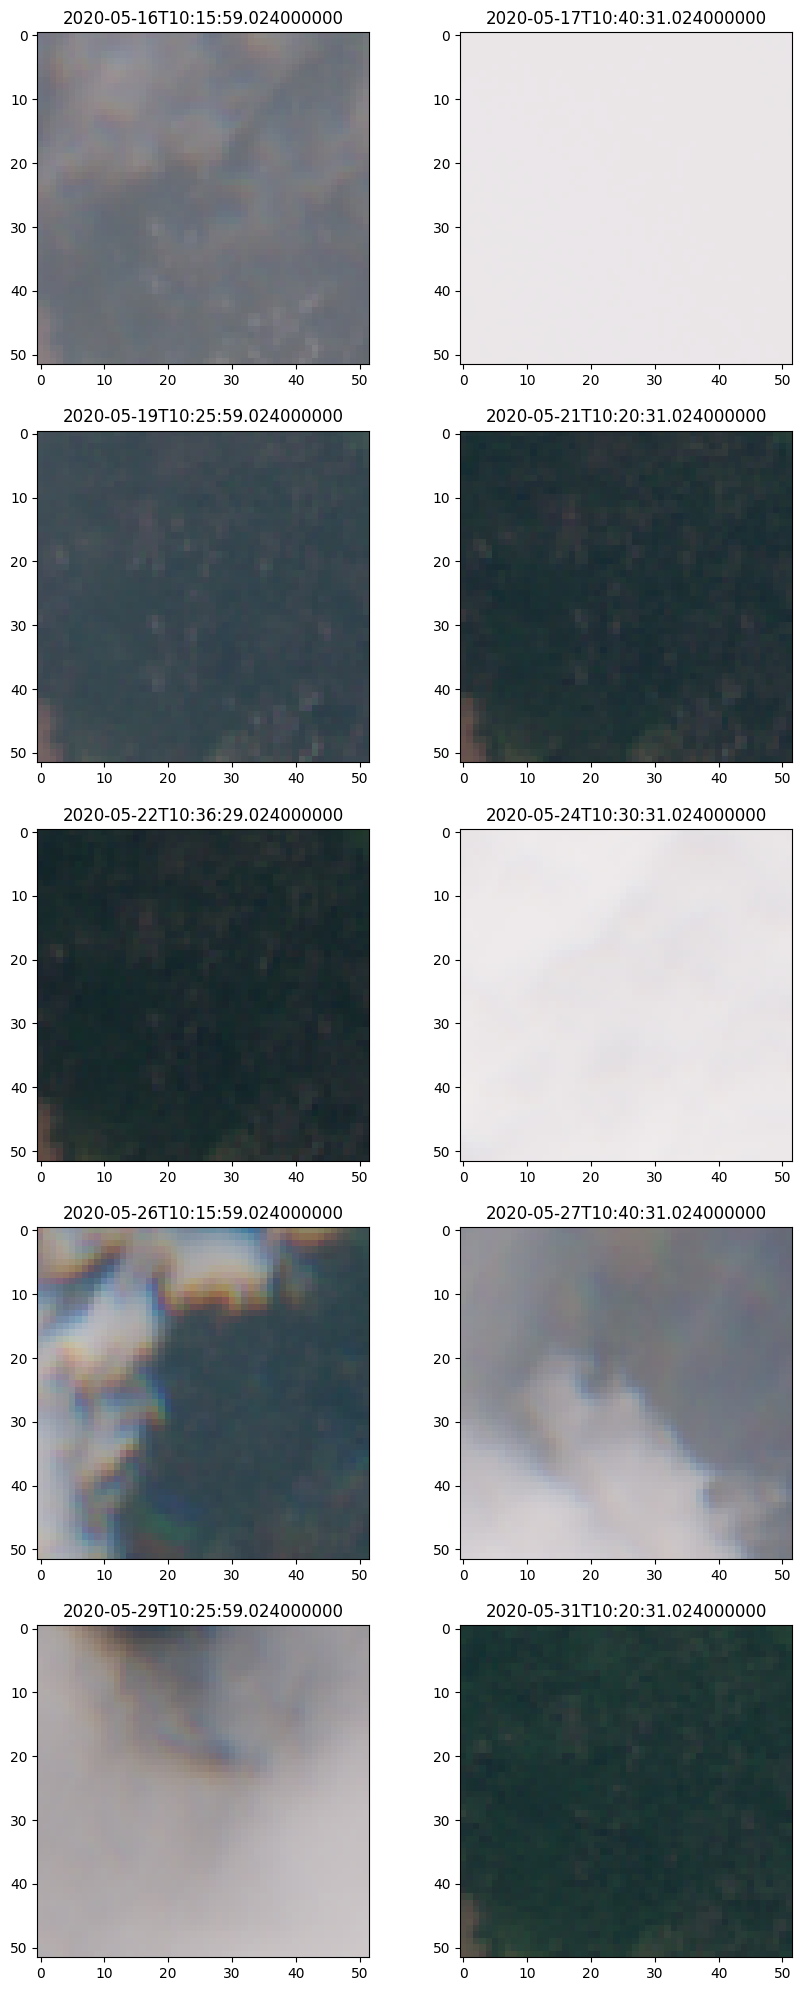

In [ ]:
ncols=2
nrows=int(np.ceil(len(times)/ncols))

plt.rcParams['figure.figsize'] = [5*ncols, 5*nrows]
fig, axs = plt.subplots(ncols=ncols,nrows=nrows)
for i,ax in enumerate(axs.ravel()):
    b04=variables['b04'].data[i,:,:]
    b03=variables['b03'].data[i,:,:]
    b02=variables['b02'].data[i,:,:]

    b04T=sAdj(b04/10000-ray['r'])
    b03T=sAdj(b03/10000-ray['g'])
    b02T=sAdj(b02/10000-ray['b'])

    rgbLin=satEnh(b04T,b03T,b02T)
    #avgS = ((b04T + b03T + b02T)/3.0) * (1 - sat)
    for k,p in enumerate(rgbLin[0]):
        for j,q in enumerate(p):
            rgbLin[0][k,j]=sRGB(q)
    for k,p in enumerate(rgbLin[1]):
        for j,q in enumerate(p):
            rgbLin[1][k,j]=sRGB(q)
    for k,p in enumerate(rgbLin[2]):
        for j,q in enumerate(p):
            rgbLin[2][k,j]=sRGB(q)
                
    b04T=rgbLin[0]
    b03T=rgbLin[1]
    b02T=rgbLin[2]

    im=np.zeros((np.shape(b03)[0],np.shape(b03)[1],3))
    im[:,:,0]=b04T
    im[:,:,1]=b03T
    im[:,:,2]=b02T

    ax.imshow(im)#/np.max(im,axis=(0,1)))
    ax.set_title(times.data[i])
    

In [ ]:
np.max(im,axis=(0,1))

array([0.86553221, 0.84275122, 0.84665169])